# Laboratorio 1 - Visión por Computadora

- Diego Estuardo Lemus López - 21469
- José Pablo Kiesling Lange - 21581
- Herber Sebastián Silva Muñoz - 21764

In [63]:
import numpy as np
import matplotlib.pyplot as plt

import cv2 as cv

import skimage as ski
from skimage import morphology as mo

### 1 . Implementar en Python una función que haga la ecualización de histograma para una imagen en escala de grises (8 bits).

In [64]:
image_path = 'assets/valley.jpg'

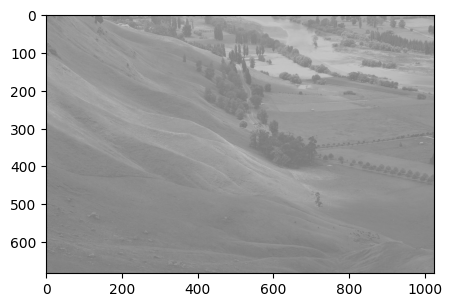

In [65]:
image = plt.imread(image_path)
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.show()

In [66]:
image = image[:,:,:3]

In [67]:
image = ski.color.rgb2gray(image)

In [68]:
image = (image * 255).astype(np.uint8)

In [69]:
def plot_histogram(image, title):
    hist, bins = np.histogram(image, bins=256, range=(0, 255))
    pixnum = image.shape[0] * image.shape[1]
    cdf = hist.cumsum() / pixnum

    fig, ax = plt.subplots()
    ax.bar(bins[:-1], hist / hist.max())
    ax.plot(bins[:-1], cdf, c='orange')
    ax.set_title(title)

    return fig, ax 

C:\Users\TheKi\AppData\Local\Temp\ipykernel_31580\1578363423.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


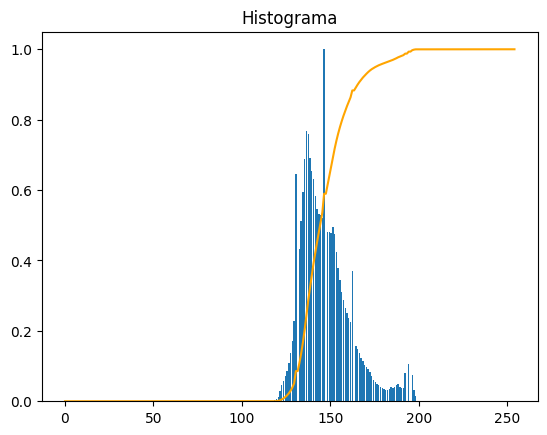

In [70]:
fig, ax = plot_histogram(image, "Histograma")
fig.show()

#### Equalización de la imagen

In [71]:
def equalize_image(image):
    hist, _ = np.histogram(image, bins=256, range=(0, 255))
    pixnum = image.shape[0] * image.shape[1]
    cdf = hist.cumsum() / pixnum
    cdf = (cdf * 255).astype(np.uint8)
    
    return cdf[image]

In [72]:
image_equalized = equalize_image(image)

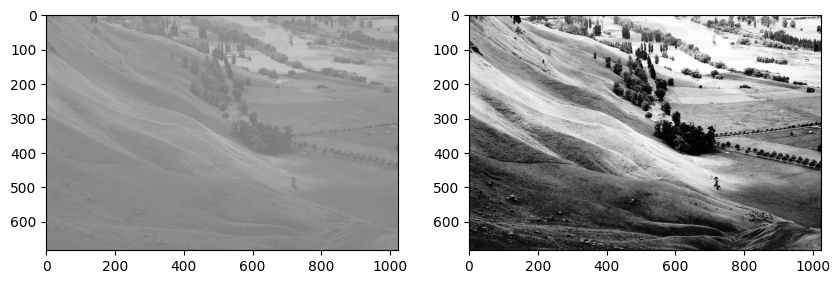

In [73]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.imshow(image_equalized, cmap='gray', vmin=0, vmax=255)

plt.show()

C:\Users\TheKi\AppData\Local\Temp\ipykernel_31580\47380211.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


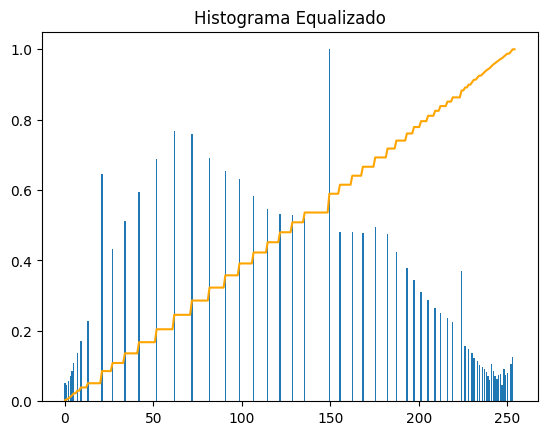

In [74]:
fig, ax = plot_histogram(image_equalized, "Histograma Equalizado")
fig.show()

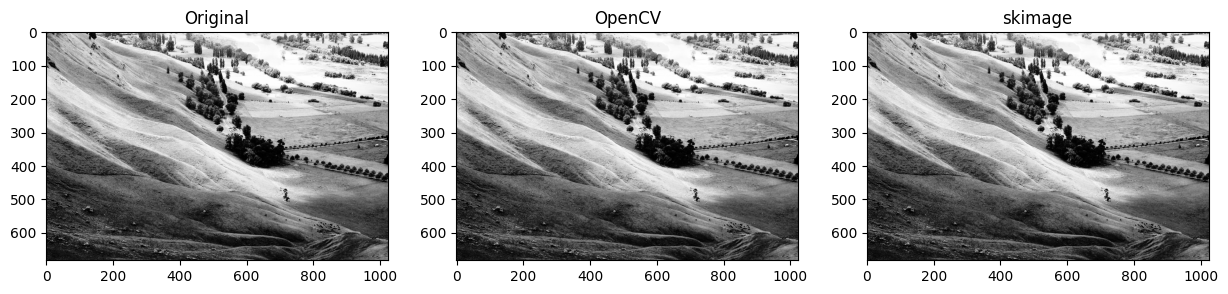

In [75]:
plt.figure(figsize=(15,5))

# Original
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(image_equalized, cmap='gray', vmin=0, vmax=255)

# OpenCV
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
image_equalized = cv.equalizeHist(image)
plt.subplot(1,3,2)
plt.title("OpenCV")
plt.imshow(image_equalized, cmap='gray', vmin=0, vmax=255)

# skimage
image = ski.io.imread(image_path, as_gray=True)
image_equalized = ski.exposure.equalize_hist(image)
plt.subplot(1,3,3)
plt.title("skimage")
plt.imshow(image_equalized, cmap='gray', vmin=0, vmax=1)

plt.show()